In [32]:
# data-analysis.ipynb

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose



In [33]:

def load_data(file_path):
    return pd.read_csv(file_path)

def simple_autocorr_plot(series, lags=144, title=""):
    autocorr = [series.autocorr(lag=i) for i in range(1, lags+1)]
    plt.plot(autocorr)
    plt.title(title)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)

def process_datetime(df):
    # First, let's see what columns exist
    print("Available columns:", df.columns.tolist())
    
    # Find the datetime column (common names)
    datetime_col = None
    for col in df.columns:
        if any(word in col.lower() for word in ['date', 'time']):
            datetime_col = col
            break
    
    if datetime_col:
        print(f"Using datetime column: {datetime_col}")
        df[datetime_col] = pd.to_datetime(df[datetime_col])
        df.set_index(datetime_col, inplace=True)
    else:
        print("No datetime column found!")
    
    return df

if __name__ == "__main__":
    # Go up one level from src/ to reach data/raw/
    file_path = '../data/raw/Tetuan City power consumption.csv'
    
    # Load and process data
    data = load_data(file_path)
    print("First few rows before processing:")
    print(data.head())
    
    data = process_datetime(data)
    
    print("After processing:")
    print(data.head())

First few rows before processing:
        DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0          0.119               34055.69620                16128.87538   
1          0.085               29814.68354                19375.07599   
2          0.100               29128.10127                19006.68693   
3          0.096               28228.86076                18361.09422   
4          0.085               27335.69620                17872.34043   

   Zone 3  Power Consumption  
0                20240.9638

In [34]:
# 2. Basic EDA

# 2.1. Dataset Info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                52416 non-null  float64
 1   Humidity                   52416 non-null  float64
 2   Wind Speed                 52416 non-null  float64
 3   general diffuse flows      52416 non-null  float64
 4   diffuse flows              52416 non-null  float64
 5   Zone 1 Power Consumption   52416 non-null  float64
 6   Zone 2  Power Consumption  52416 non-null  float64
 7   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8)
memory usage: 3.6 MB
None


In [35]:
# 2.2. Summary Statistics
print(data.describe())

        Temperature      Humidity    Wind Speed  general diffuse flows  \
count  52416.000000  52416.000000  52416.000000           52416.000000   
mean      18.810024     68.259518      1.959489             182.696614   
std        5.815476     15.551177      2.348862             264.400960   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.410000     58.310000      0.078000               0.062000   
50%       18.780000     69.860000      0.086000               5.035500   
75%       22.890000     81.400000      4.915000             319.600000   
max       40.010000     94.800000      6.483000            1163.000000   

       diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
count   52416.000000              52416.000000               52416.000000   
mean       75.028022              32344.970564               21042.509082   
std       124.210949               7130.562564                5201.465892   
min         0.011000     

In [36]:
# 2.3. Missing Values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64


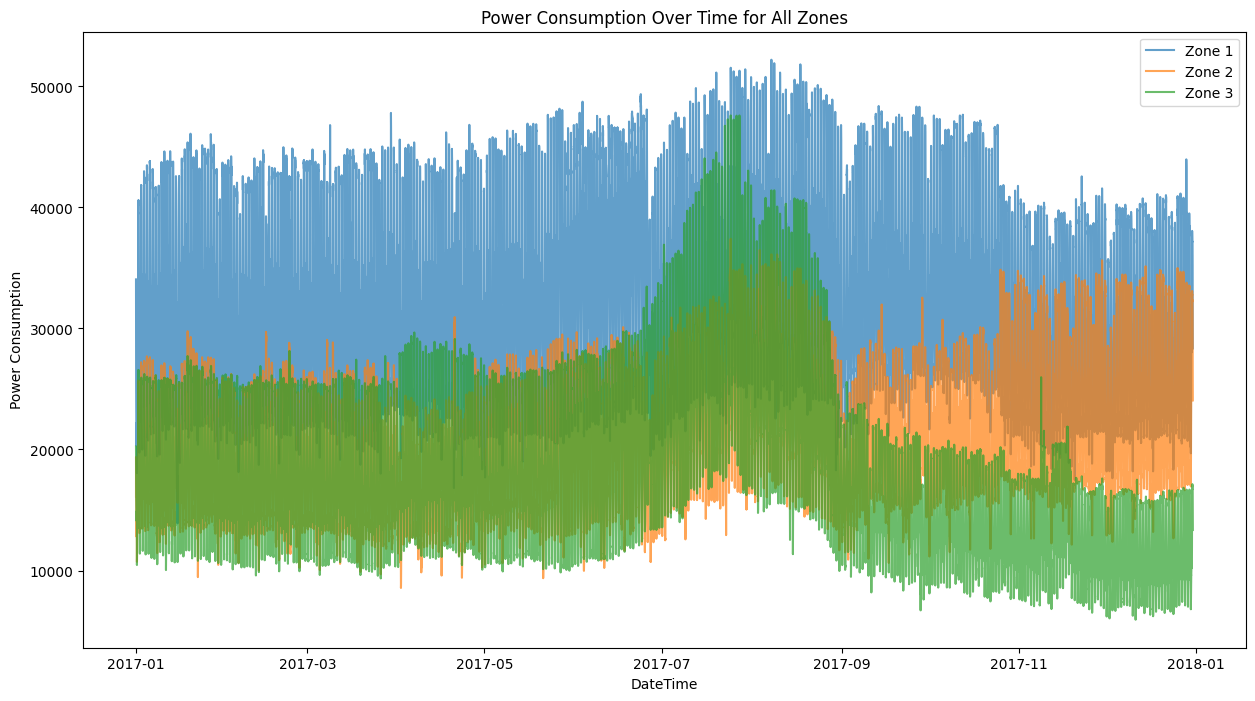

In [37]:
# 2.4. Data Visualization - Time Series Plots
plt.figure(figsize=(15, 8))
plt.plot(data['Zone 1 Power Consumption'], label='Zone 1', alpha=0.7)
plt.plot(data['Zone 2  Power Consumption'], label='Zone 2', alpha=0.7)
plt.plot(data['Zone 3  Power Consumption'], label='Zone 3', alpha=0.7)
plt.title('Power Consumption Over Time for All Zones')
plt.xlabel('DateTime')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

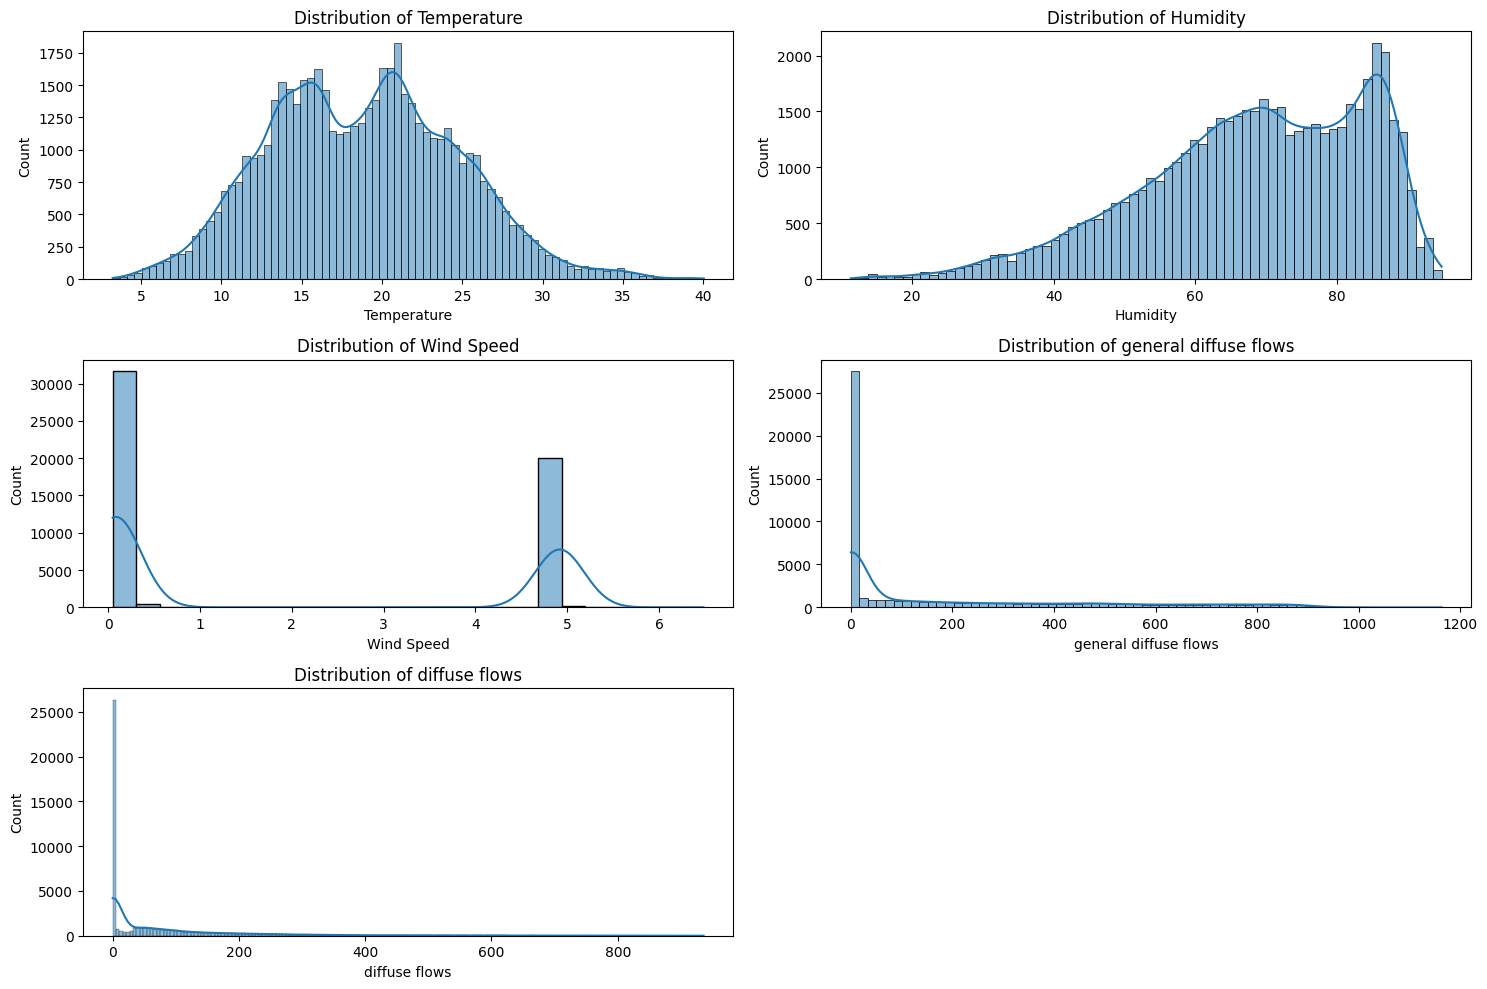

In [38]:
# 2.5. Distribution of Features
features = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

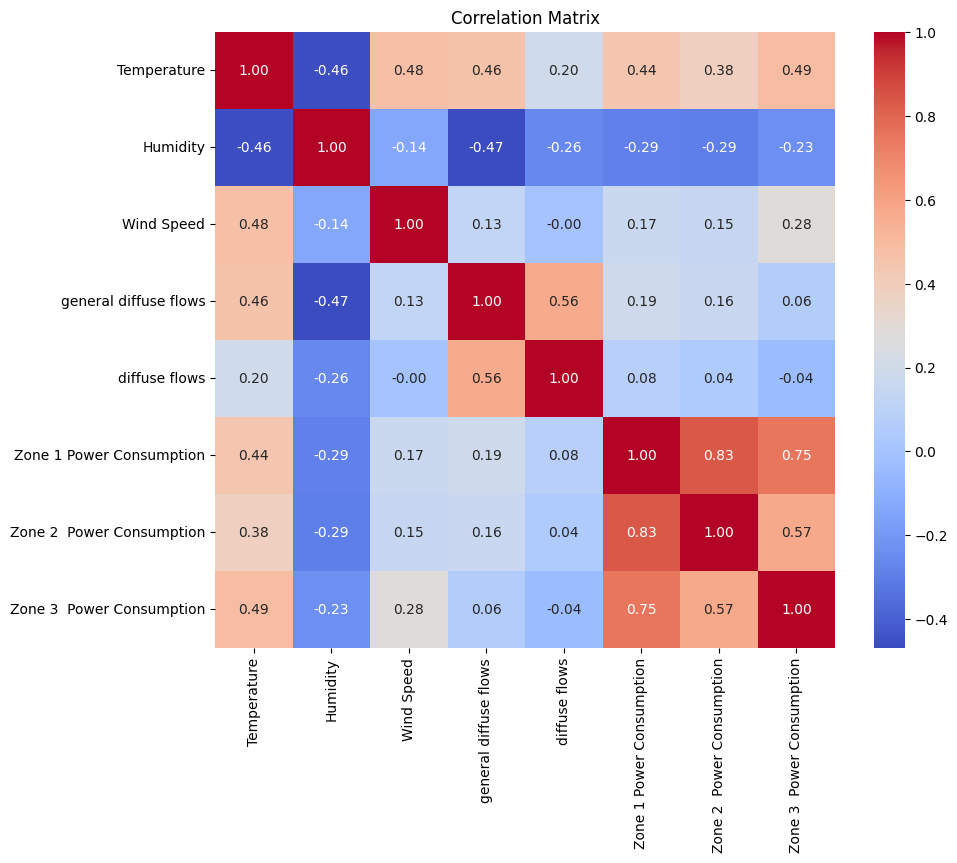

In [39]:
# 2.6. Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

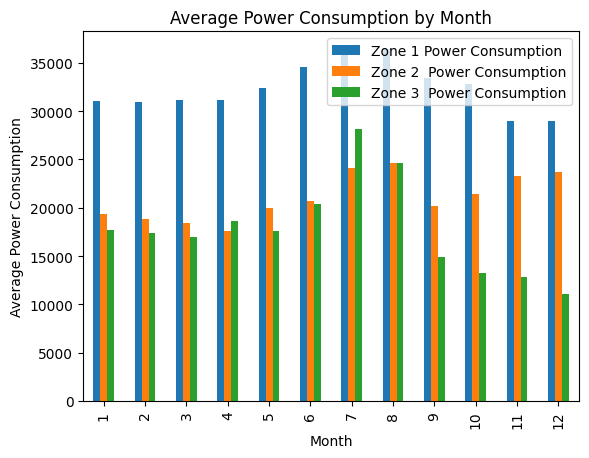

In [40]:
# 2.7. Monthly Trends
data['Month'] = data.index.month
monthly_avg = data.groupby('Month')[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']].mean()

plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar')
plt.title('Average Power Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Average Power Consumption')
plt.legend()
plt.show()

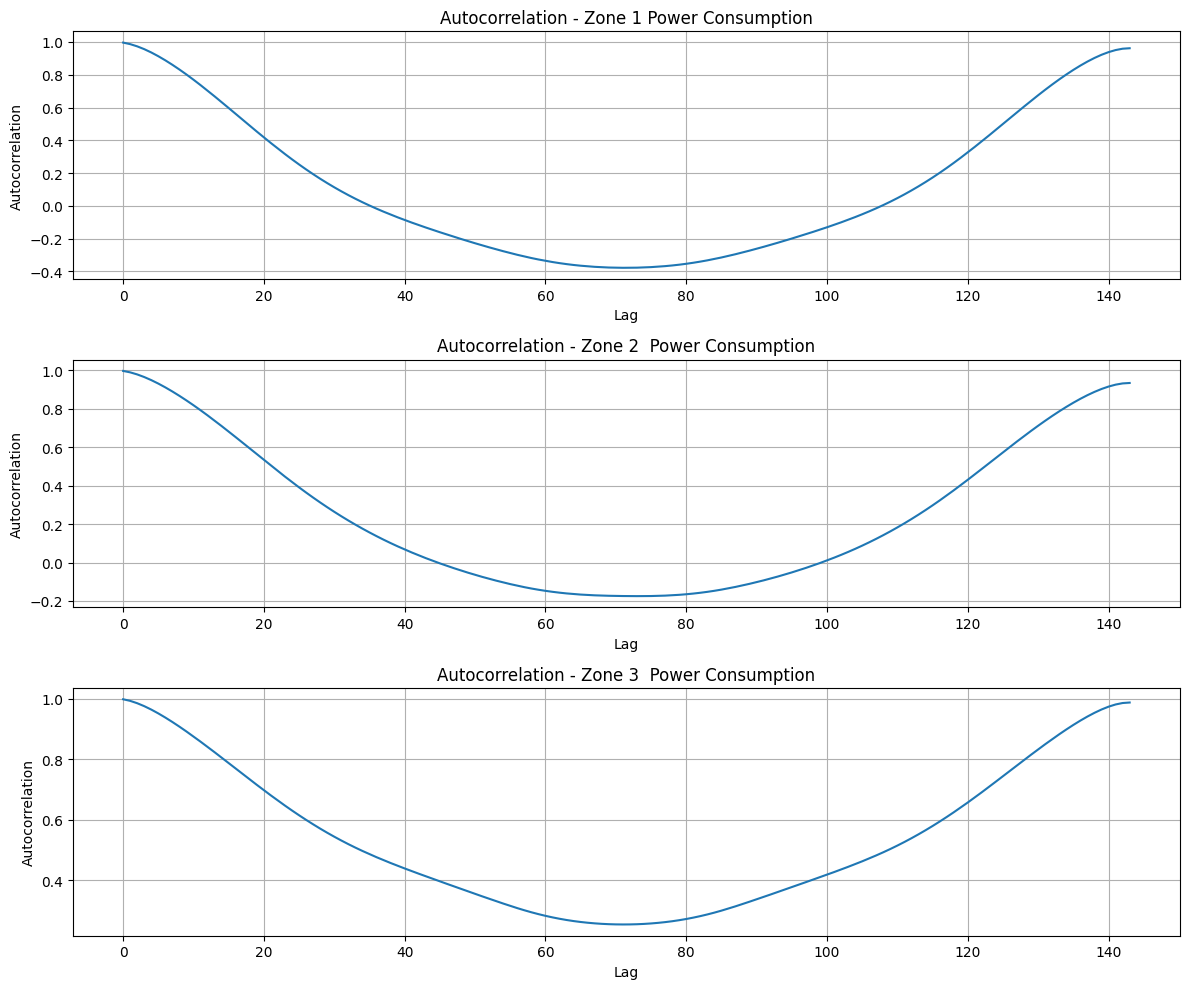

In [41]:
zones = ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']

plt.figure(figsize=(12, 10))
for i, zone in enumerate(zones, 1):
    plt.subplot(3, 1, i)
    
    # Calculate autocorrelation inline
    autocorr = [data[zone].autocorr(lag=lag) for lag in range(1, 145)]
    
    plt.plot(autocorr)
    plt.title(f'Autocorrelation - {zone}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# 3. Lag Relationships

for zone in zones:
    data[f'{zone}_lag_1h'] = data[zone].shift(6)  # 1-hour lag
    data[f'{zone}_lag_24h'] = data[zone].shift(144)  # 24-hour lag

print("\nCorrelation with Lagged Features:")
for zone in zones:
    print(f"\n{zone}:")
    print(f"Correlation with 1-hour lag: {data[zone].corr(data[f'{zone}_lag_1h']):.3f}")
    print(f"Correlation with 24-hour lag: {data[zone].corr(data[f'{zone}_lag_24h']):.3f}")


Correlation with Lagged Features:

Zone 1 Power Consumption:
Correlation with 1-hour lag: 0.913
Correlation with 24-hour lag: 0.962

Zone 2  Power Consumption:
Correlation with 1-hour lag: 0.931
Correlation with 24-hour lag: 0.934

Zone 3  Power Consumption:
Correlation with 1-hour lag: 0.951
Correlation with 24-hour lag: 0.987


<Figure size 1000x600 with 0 Axes>

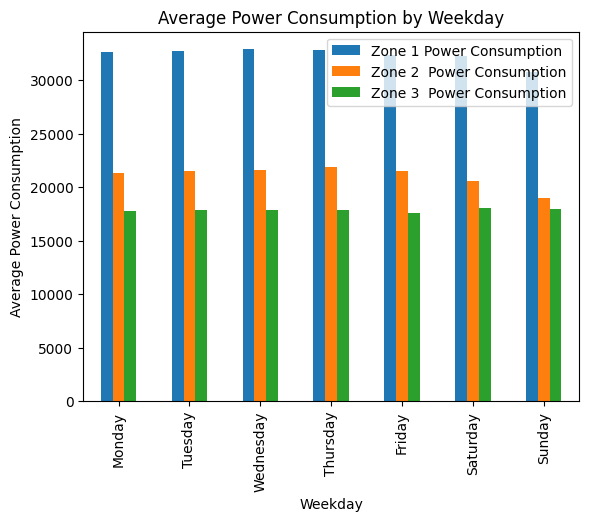

In [ ]:
# 4. Weekday Variability in Power Consumption

data['Weekday'] = data.index.day_name()

# Group by weekday and calculate mean power consumption
weekday_avg = data.groupby('Weekday')[zones].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10, 6))
weekday_avg.plot(kind='bar')
plt.title('Average Power Consumption by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Power Consumption')
plt.legend()
plt.show()

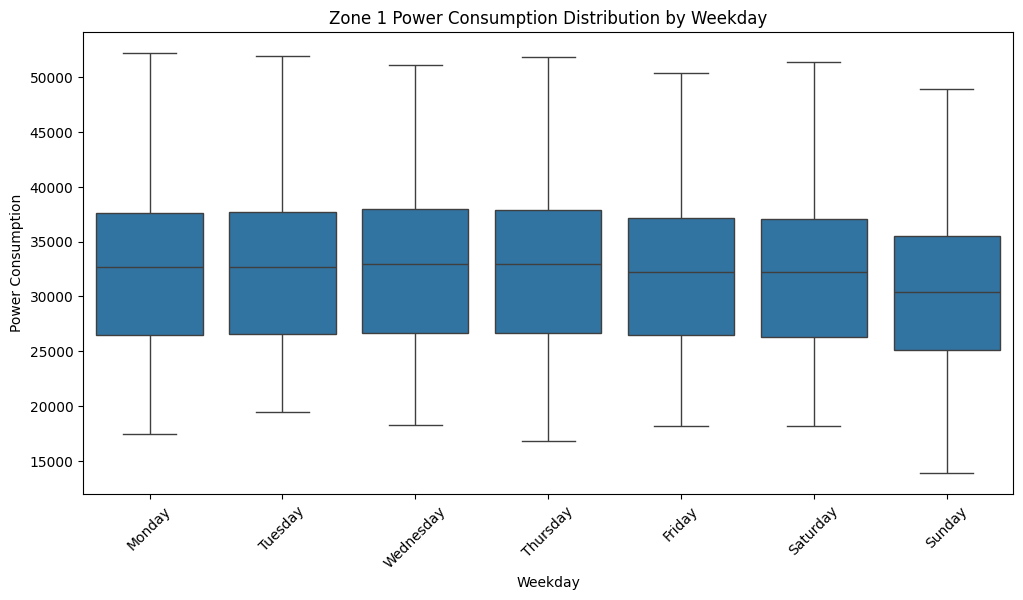

In [ ]:
# 5. Boxplot for weekday variability
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weekday', y='Zone 1 Power Consumption', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Zone 1 Power Consumption Distribution by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Power Consumption')
plt.xticks(rotation=45)
plt.show()

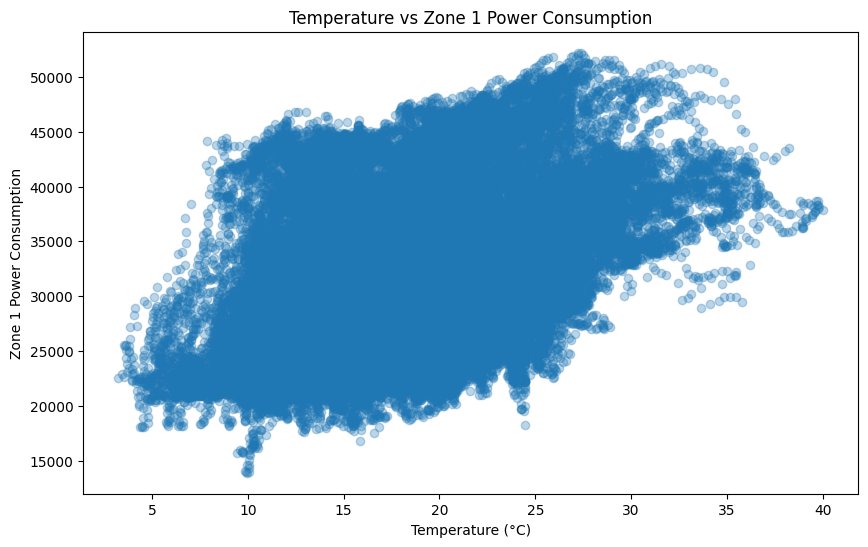

In [ ]:
# 6. Temperature vs Zone 1 Power Consumption
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['Zone 1 Power Consumption'], alpha=0.3)
plt.title('Temperature vs Zone 1 Power Consumption')
plt.xlabel('Temperature (°C)')
plt.ylabel('Zone 1 Power Consumption')
plt.show()

/var/folders/c4/yz_ylt6s7jb_mw31vblcspyr0000gn/T/ipykernel_68211/1837450737.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_power_avg = data.groupby('Temp_Bin')['Zone 1 Power Consumption'].mean()


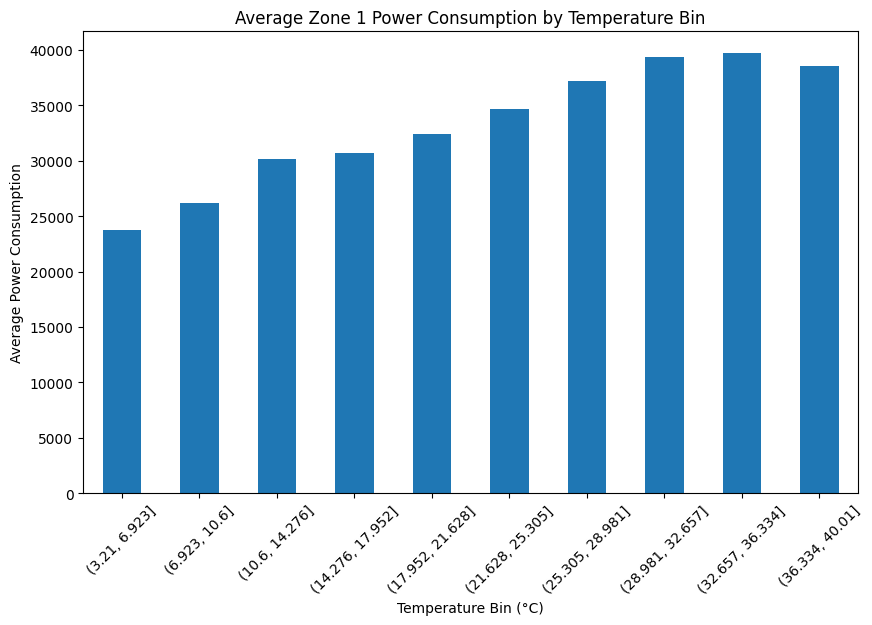

In [ ]:
# 7. Binned temperature analysis
data['Temp_Bin'] = pd.cut(data['Temperature'], bins=10)
temp_power_avg = data.groupby('Temp_Bin')['Zone 1 Power Consumption'].mean()

plt.figure(figsize=(10, 6))
temp_power_avg.plot(kind='bar')
plt.title('Average Zone 1 Power Consumption by Temperature Bin')
plt.xlabel('Temperature Bin (°C)')
plt.ylabel('Average Power Consumption')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 8. Correlation between lagged features and current power consumption
print("\nCorrelation with Lagged Features:")
for zone in zones:
    print(f"\n{zone}:")
    print(f"Correlation with 1-hour lag: {data[zone].corr(data[f'{zone}_lag_1h']):.3f}")
    print(f"Correlation with 24-hour lag: {data[zone].corr(data[f'{zone}_lag_24h']):.3f}")


Correlation with Lagged Features:

Zone 1 Power Consumption:
Correlation with 1-hour lag: 0.913
Correlation with 24-hour lag: 0.962

Zone 2  Power Consumption:
Correlation with 1-hour lag: 0.931
Correlation with 24-hour lag: 0.934

Zone 3  Power Consumption:
Correlation with 1-hour lag: 0.951
Correlation with 24-hour lag: 0.987


In [48]:
# Correlation between Temperature and Zone 1 Power Consumption
print("\nCorrelation between Temperature and Zone 1 Power Consumption:")
print(f"{data['Temperature'].corr(data['Zone 1 Power Consumption']):.3f}")


Correlation between Temperature and Zone 1 Power Consumption:
0.440


In [49]:
# 9. Feature-Target Alignment
print("\nCorrelation between Features and Power Consumption:")
correlation_matrix = data[features + zones].corr()
print(correlation_matrix[zones].loc[features])


Correlation between Features and Power Consumption:
                       Zone 1 Power Consumption  Zone 2  Power Consumption  \
Temperature                            0.440221                   0.382428   
Humidity                              -0.287421                  -0.294961   
Wind Speed                             0.167444                   0.146413   
general diffuse flows                  0.187965                   0.157223   
diffuse flows                          0.080274                   0.044667   

                       Zone 3  Power Consumption  
Temperature                             0.489527  
Humidity                               -0.233022  
Wind Speed                              0.278641  
general diffuse flows                   0.063376  
diffuse flows                          -0.038506  


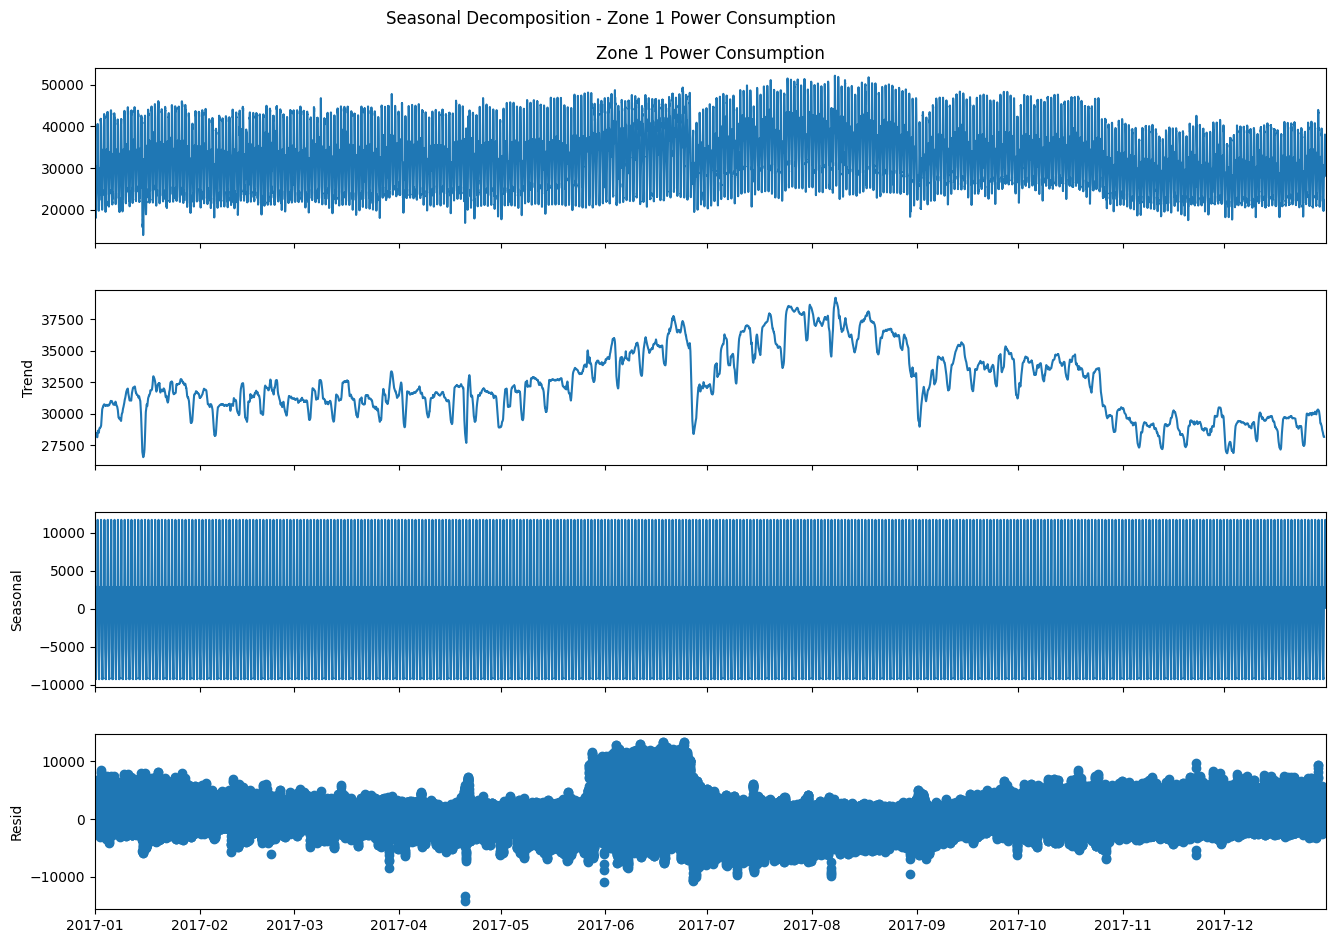

In [ ]:
# 10. Seasonality Analysis
# Decompose time series for Zone 1 (example) to identify trend, seasonality, and residual
decomposition = seasonal_decompose(data['Zone 1 Power Consumption'], model='additive', period=144)
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.suptitle('Seasonal Decomposition - Zone 1 Power Consumption')
plt.show()

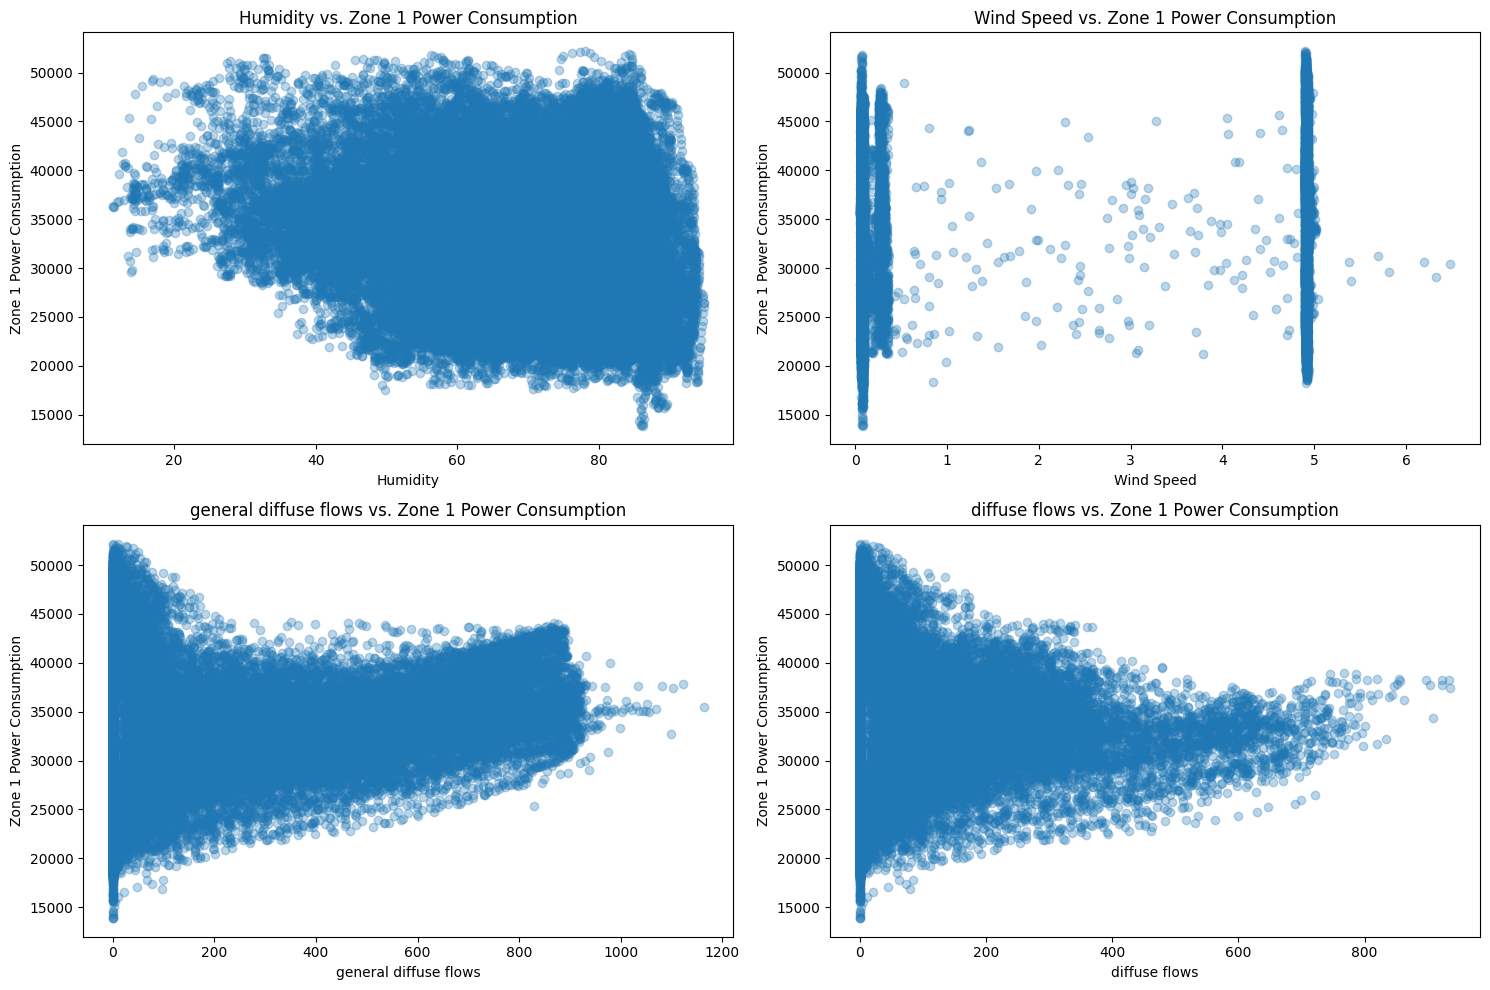

In [51]:
# Scatter plots for other features vs. Zone 1 Power Consumption
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features[1:], 1):  # Exclude Temperature (already plotted)
    plt.subplot(2, 2, i)
    plt.scatter(data[feature], data['Zone 1 Power Consumption'], alpha=0.3)
    plt.title(f'{feature} vs. Zone 1 Power Consumption')
    plt.xlabel(feature)
    plt.ylabel('Zone 1 Power Consumption')
plt.tight_layout()
plt.show()